In [28]:
# import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.visualization import *
# from qiskit.tools.visualization import plot_histogram
# from qiskit.providers.aer import QasmSimulator
# from ibm_quantum_widgets import *
# from qiskit.tools.jupyter import *
# import pandas as pd

# Loading your IBM Quantum account(s)
# IBMQ.save_account("<your_access_token>") # Do this only once in a particular PC
# provider = IBMQ.load_account()

In [29]:
old_qc = QuantumCircuit
del QuantumCircuit
class QuantumCircuit(old_qc):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.qc = self
        
    def ccxx(
        self,
        control_qubit1,
        control_qubit2,
        target_qubit1,
        target_qubit2,
        ctrl_state = None
    ):
        from qiskit.circuit.library.standard_gates.x import CCXGate
        
        self.append(
            CCXGate(ctrl_state=ctrl_state),
            [control_qubit1, control_qubit2, target_qubit1],
            [],
        )
        
        self.append(
            CCXGate(ctrl_state=ctrl_state),
            [control_qubit1, control_qubit2, target_qubit2],
            [],
        )
        return None

In [30]:
ancilla = QuantumRegister(2, 'ancilla')
qreg = QuantumRegister(3, 'qreg')
creg = ClassicalRegister(3, 'creg')
circuit = QuantumCircuit(ancilla, qreg, creg)

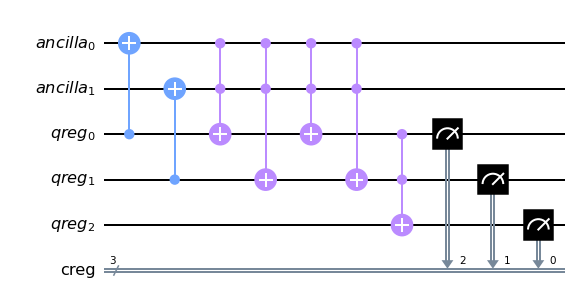

In [31]:
circuit.cx(qreg[0], ancilla[0])
circuit.cx(qreg[1], ancilla[1])
circuit.ccxx(ancilla[0], ancilla[1], qreg[0], qreg[1])
circuit.ccxx(ancilla[0], ancilla[1], qreg[0], qreg[1])
circuit.ccx(qreg[0], qreg[1], qreg[2])
circuit.measure(qreg[0], creg[2])
circuit.measure(qreg[1], creg[1])
circuit.measure(qreg[2], creg[0])
circuit.draw(output = 'mpl')